## Introduction

This notebook is to build the model for Intel's cervical type prediction competition on kaggle. We will be using convolutional neural networks for the prediction, using a pre-trained vgg16 model, and finetuning it for our data.

In [20]:
%pwd

u'/data0/krohitm/repo/fast_ai/deeplearning1/nbs'

In [21]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/intel/data/cervical'

In [22]:
#Allow relative imports to directories above lesson1/
sys.path.insert(1, os.path.join(sys.path[0], '..'))

#import modules
from utils import *
from vgg16 import Vgg16

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

## Action Plan
1. Create Validation and Sample sets
2. Rearrange image files into their respective directories 
3. Finetune and Train model
4. Generate predictions
5. Validate predictions
6. Submit predictions to Kaggle

In [21]:
#Create directories
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical
mkdir: cannot create directory ‘valid’: File exists
mkdir: cannot create directory ‘results’: File exists


In [39]:
%cd $DATA_HOME_DIR/train

/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/train


In [44]:
_,dirs,_ = os.walk('./').next()
for dir in dirs:
    %cd ./$dir
    g = glob('*.jpg')
    shuf = np.random.permutation(g)
    #print int(.1*len(shuf))
    for i in range(int(.1*len(shuf))): 
        os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + dir + '.'+ shuf[i])
    %cd ..

/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/train/Type_2
/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/train
/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/train/Type_1
/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/train
/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/train/Type_3
/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/train


## Rearrange image files into their respective directories


In [46]:
%cd $DATA_HOME_DIR/valid
%mkdir Type_1
%mkdir Type_2
%mkdir Type_3
%mv Type_1.*.jpg Type_1/
%mv Type_2.*.jpg Type_2/
%mv Type_3.*.jpg Type_3/

/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/valid
mkdir: cannot create directory ‘Type_1’: File exists
mkdir: cannot create directory ‘Type_2’: File exists
mv: cannot stat 'Type_1.*.jpg': No such file or directory
mv: cannot stat 'Type_2.*.jpg': No such file or directory


In [ ]:
# Create single 'unknown' class for test set
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

In [23]:
import utils; reload(utils)
from utils import plots

## Finetuning and Training

In [24]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/' #'/sample/'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical


In [25]:
#import Vgg16 helper class
vgg = Vgg16()

In [26]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=64
no_of_epochs=3

In [27]:
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)

Found 1333 images belonging to 3 classes.
Found 148 images belonging to 3 classes.


In [28]:
#Not sure if we set this for all fits
#vgg.model.optimizer.lr = 0.01

vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
1333/1333 [==============================] - 423s - loss: 1.9569 - acc: 0.4486 - val_loss: 1.1931 - val_acc: 0.5270

In [ ]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
1269/1333 [===========================>..] - ETA: 18s - loss: 1.3230 - acc: 0.5390 

In [30]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
1333/1333 [==============================] - 410s - loss: 1.5318 - acc: 0.5011 - val_loss: 1.1157 - val_acc: 0.4932

In [31]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
1333/1333 [==============================] - 413s - loss: 1.3821 - acc: 0.5221 - val_loss: 1.0955 - val_acc: 0.5878

In [32]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
1333/1333 [==============================] - 413s - loss: 1.3699 - acc: 0.5311 - val_loss: 1.3195 - val_acc: 0.3784

In [14]:
vgg.model.save_weights(path+'results/ft1.h5')

In [8]:
vgg.model.load_weights(path+'results/ft1.h5')

In [9]:
batches, predictions = vgg.test(test_path, batch_size=batch_size*2)

Found 512 images belonging to 1 classes.


KeyboardInterrupt: 

In [ ]:
filenames = batches.filenames

In [12]:
import csv

In [21]:
#img_nums = map(lambda t: (t.split('.')[0]), filenames)
image_names = map(lambda t: (t.split('/')[1]), filenames)
#preds = map(lambda q: ("%.4f" %q), np.clip(predictions[:,1], 0.025, 0.975))
preds1 = map(lambda q: ("%.16f" %q), predictions[:,0])
preds2 = map(lambda q: ("%.16f" %q), predictions[:,1])
preds3 = map(lambda q: ("%.16f" %q), predictions[:,2])
test_results = np.column_stack((image_names, preds1, preds2, preds3))

In [22]:
with open (path+'results/test_preds.csv', 'w') as f:
    f.write('image_name,Type_1,Type_2,Type_3\n')

with open (path+'results/test_preds.csv', 'a') as f:
    wr = csv.writer(f, delimiter = ",")
    wr.writerows(test_results)

In [23]:
from IPython.display import FileLink
FileLink(path+'results/test_preds.csv')

/data0/krohitm/repo/fast_ai/deeplearning1/nbs/intel/data/cervical/results/test_preds.csv

## Validate predictions


Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting. 

- **Tip**: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [10]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 148 images belonging to 3 classes.


In [20]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

In [30]:
#Round our predictions to 0/1 to generate labels
our_predictions = probs
our_labels = np.argmax(our_predictions,axis = 1)
#print our_labels

[1 1 0 1 1 1 1 1 1 0 2 0 0 1 0 0 1 1 1 1 2 2 0 1 1 1 2 1 1 2 1 1 1 1 0 0 2 1 1 2 1 2 1 1 1 1 1 2 1 1
 1 2 1 1 1 0 1 1 2 1 1 1 1 2 1 2 1 0 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1 1 2 2 1 2 1 2 1 1 0 1 2 1 1 1 1
 0 1 2 2 1 1 2 1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 1 2 2 2 0 2 1 1 1 2 1 2 2 1 1 1 2 2 2 2 1 1 1 2]


In [31]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 81 correct labels
Showing labels of correct type being predicted


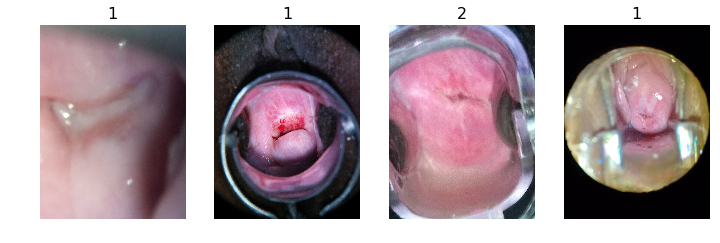

In [41]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print ("Found %d correct labels" % len(correct))
idx = np.random.choice((correct),n_view, replace = False)
plots_idx(idx, our_labels[idx])
print ("Showing labels of correct type being predicted")

Found 67 incorrect labels
Showing incorrect labels being predicted


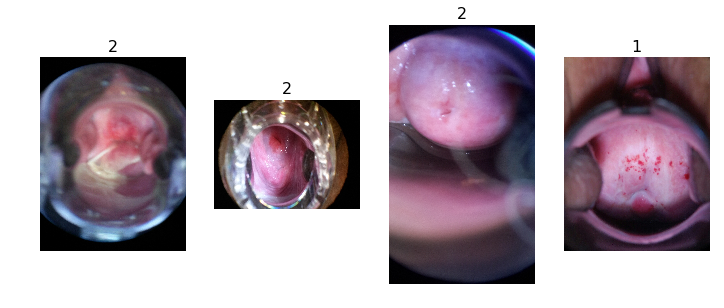

In [40]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print ("Found %d incorrect labels" % len(incorrect))
idx = np.random.choice((incorrect),n_view, replace = False)
plots_idx(idx, our_labels[idx])
print ("Showing incorrect labels being predicted")

Found 7 confident correct Type 1 labels


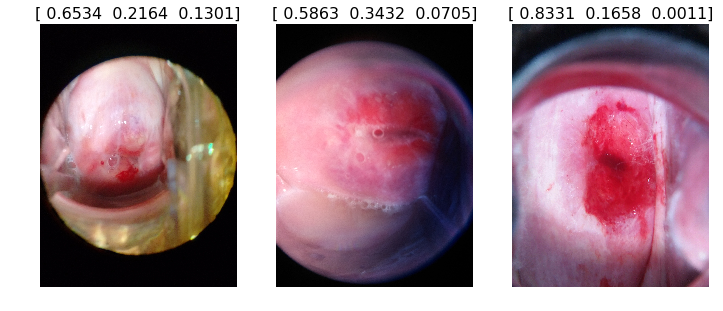

In [65]:
#3a. The images we most confident were Type_1, and are actually Type_1
correct_type1 = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print ("Found %d confident correct Type 1 labels" % len(correct_type1))
most_correct_type1 = np.argsort(our_labels[correct_type1])[::-1][:3]
plots_idx(correct_type1[most_correct_type1], our_predictions[correct_type1][most_correct_type1])

Found 52 confident correct Type 2 labels


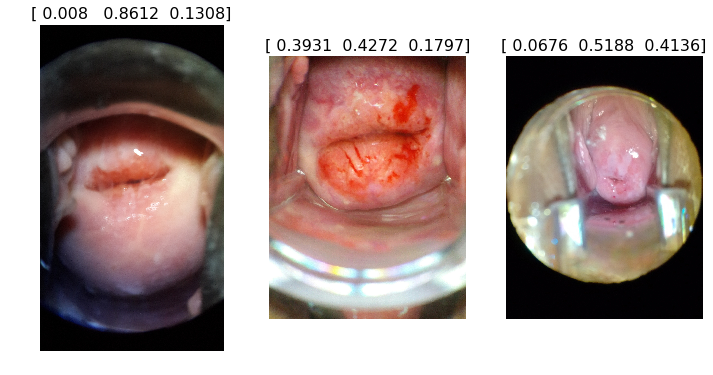

In [44]:
#3b. The images we most confident were Type_2, and are actually Type_2
correct_type2 = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print ("Found %d confident correct Type 2 labels" % len(correct_type2))
most_correct_type2 = np.argsort(our_labels[correct_type2])[::-1][:3]
plots_idx(correct_type2[most_correct_type2], our_predictions[correct_type2][most_correct_type2])

Found 22 confident correct Type 3 labels


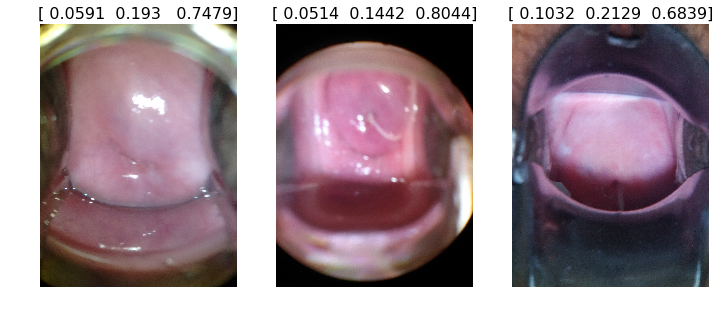

In [49]:
#3c. The images we most confident were Type_3, and are actually Type_3
correct_type3 = np.where((our_labels==2) & (our_labels==expected_labels))[0]
print ("Found %d confident correct Type 3 labels" % len(correct_type3))
most_correct_type3 = np.argsort(our_labels[correct_type3])[::-1][:3]
plots_idx(correct_type3[most_correct_type3], our_predictions[correct_type3][most_correct_type3])

Found 6 incorrect Type 2 predicted as type 1


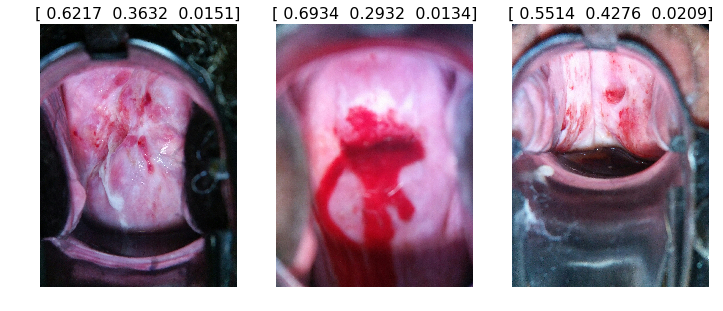

In [56]:
#4a. The images we were most confident were Type_1, but are actually Type_2
incorrect_type1 = np.where((our_labels==0) & (expected_labels==1))[0]
print ("Found %d incorrect Type 2 predicted as type 1" % len(incorrect_type1))
if len(incorrect_type1):
    most_incorrect_type1 = np.argsort(our_labels[incorrect_type1])[::-1][:3]
    plots_idx(incorrect_type1[most_incorrect_type1], our_predictions[incorrect_type1][most_incorrect_type1])

Found 1 incorrect Type 3 predicted as type 1


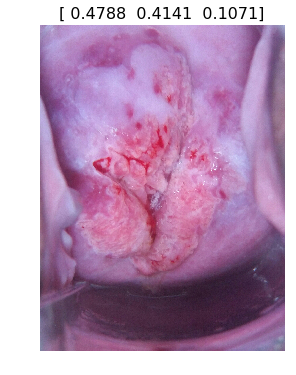

In [60]:
#4b. The images we were most confident were Type_1, but are actually Type_3
incorrect_type1 = np.where((our_labels==0) & (expected_labels==2))[0]
print ("Found %d incorrect Type 3 predicted as type 1" % len(incorrect_type1))
if len(incorrect_type1):
    most_incorrect_type1 = np.argsort(our_labels[incorrect_type1])[::-1][:3]
    plots_idx(incorrect_type1[most_incorrect_type1], our_predictions[incorrect_type1][most_incorrect_type1])

Found 15 incorrect Type 1 predicted as type 2


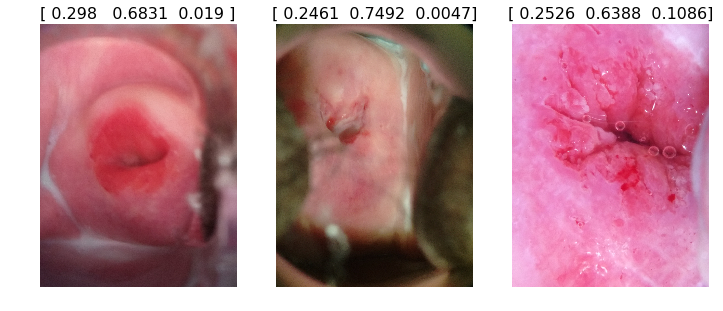

In [61]:
#4c. The images we were most confident were Type_2, but are actually Type_1
incorrect_type2 = np.where((our_labels==1) & (expected_labels==0))[0]
print ("Found %d incorrect Type 1 predicted as type 2" % len(incorrect_type2))
if len(incorrect_type2):
    most_incorrect_type2 = np.argsort(our_labels[incorrect_type2])[::-1][:3]
    plots_idx(incorrect_type2[most_incorrect_type2], our_predictions[incorrect_type2][most_incorrect_type2])

Found 22 incorrect Type 3 predicted as Type 2


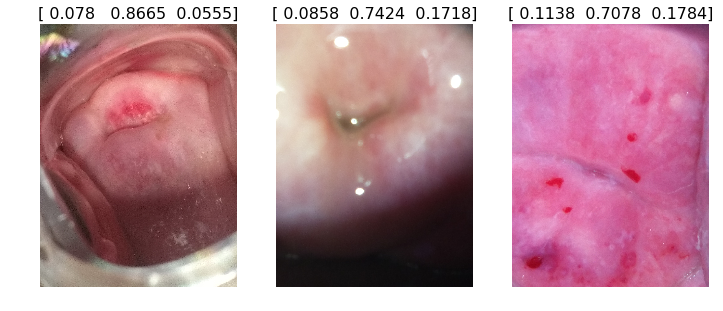

In [63]:
#4d. The images we were most confident were Type_2, but are actually Type_3
incorrect_type2 = np.where((our_labels==1) & (expected_labels==2))[0]
print ("Found %d incorrect Type 3 predicted as Type 2" % len(incorrect_type2))
if len(incorrect_type2):
    most_incorrect_type2 = np.argsort(our_labels[incorrect_type2])[::-1][:3]
    plots_idx(incorrect_type2[most_incorrect_type2], our_predictions[incorrect_type2][most_incorrect_type2])

Found 3 incorrect Type 1 predicted as Type 3


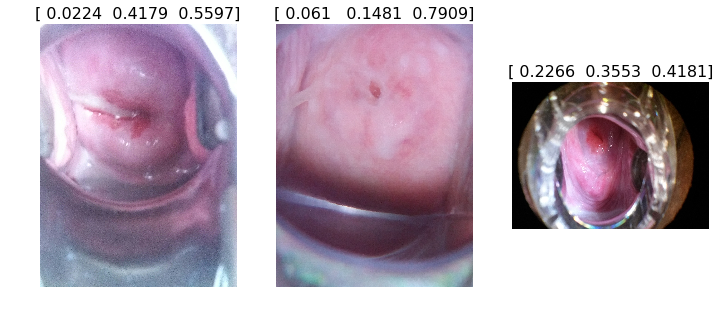

In [66]:
#4e. The images we were most confident were Type_3, but are actually Type_1
incorrect_type3 = np.where((our_labels==2) & (expected_labels==0))[0]
print ("Found %d incorrect Type 1 predicted as Type 3" % len(incorrect_type3))
if len(incorrect_type3):
    most_incorrect_type3 = np.argsort(our_labels[incorrect_type3])[::-1][:3]
    plots_idx(incorrect_type3[most_incorrect_type3], our_predictions[incorrect_type3][most_incorrect_type3])

Found 20 incorrect Type 1 predicted as Type 3


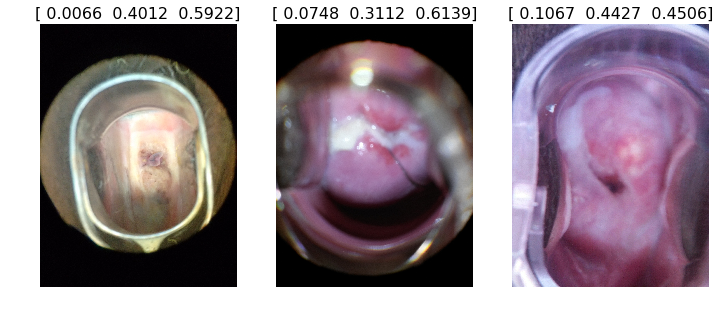

In [67]:
#4f. The images we were most confident were Type_3, but are actually Type_2
incorrect_type3 = np.where((our_labels==2) & (expected_labels==1))[0]
print ("Found %d incorrect Type 1 predicted as Type 3" % len(incorrect_type3))
if len(incorrect_type3):
    most_incorrect_type3 = np.argsort(our_labels[incorrect_type3])[::-1][:3]
    plots_idx(incorrect_type3[most_incorrect_type3], our_predictions[incorrect_type3][most_incorrect_type3])

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

Confusion matrix, without normalization
[[ 7 15  3]
 [ 6 52 20]
 [ 1 22 22]]
Percentage confusion matrix
[[ 28.    60.    12.  ]
 [  7.69  66.67  25.64]
 [  2.22  48.89  48.89]]


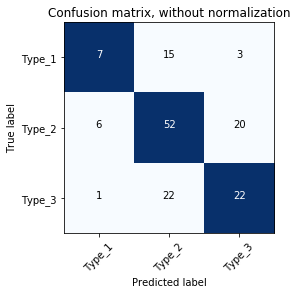

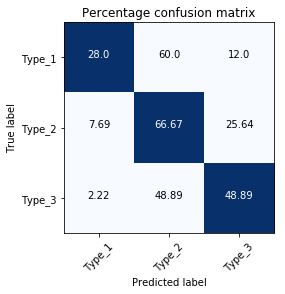

In [79]:
import plot_confusion_matrix
plot_confusion_matrix.main(expected_labels, our_labels, ['Type_1', 'Type_2', 'Type_3'])